###We construct portfolios to:



1.   Diversify risk: By combining multiple assets with different risk and return characteristics, we can reduce the overall risk of our portfolio. This is because the returns of different assets are not perfectly correlated, so when one asset performs poorly, another asset may perform well, offsetting the losses.

2.  Enhance returns: By carefully selecting assets with high expected returns, we can construct a portfolio that has a higher expected return than any of the individual assets. This is because the expected return of a portfolio is a weighted average of the expected returns of the individual assets.

3. Meet specific investment objectives: Different investors have different investment objectives, such as maximizing returns, minimizing risk, or generating income. By constructing a portfolio that is tailored to our specific investment objectives, we can increase the likelihood of achieving our goals.

4. Manage cash flow: By constructing a portfolio with a mix of assets that have different cash flow characteristics, we can ensure that we have sufficient cash flow to meet our needs. For example, we may include some assets that generate regular income, such as bonds, and some assets that have the potential for capital appreciation, such as stocks.

5. Reduce transaction costs: By constructing a portfolio with a mix of assets that have different transaction costs, we can reduce the overall transaction costs of our investment. For example, we may include some assets that have low transaction costs, such as ETFs, and some assets that have higher transaction costs, such as individual stocks.


In [ ]:
#IMPORTING NECESSARY DATA ANALYSIS AND VISUALIZATION LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import yfinance as yf
import plotly.express as px
import plotly.graph_objs as go

%matplotlib inline

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.options.display.precision = 4
plt.style.use('seaborn-ticks')

#INVESTING IN A SINGLE STOCK

>Investing 100% allocation in one or two assets is not advisable because it exposes the investor to a high level of risk. Here are the reasons why:

1. Lack of diversification: Diversification is a risk management strategy that involves spreading investments across different assets. By investing 100% in one or two assets, the investor is not diversified and is therefore exposed to the full risk of those assets.

2. Lack of diversification: Diversification is a risk management strategy that involves spreading investments across different assets. By investing 100% in one or two assets, the investor is not diversified and is therefore exposed to the full risk of those assets.

3. Potential for catastrophic loss: If one of the assets in which the investor has invested 100% loses value, the investor could lose a significant portion of their investment. This is especially true if the asset is illiquid and the investor is unable to sell it quickly.

For these reasons, it is generally advisable to diversify investments across a range of assets. This will help to reduce the risk of the investment portfolio and provide the investor with a more stable return.
























#IF NOT ONE , THEN HOW MANY STOCKS TO KEEP IN  A PORTFOLIO IDEALLY?

The ideal number of stocks in a portfolio depends on the investor's risk tolerance, investment goals, and diversification strategy.



1. Investors with a higher risk tolerance may hold fewer stocks, while those with long-term goals may hold more.
2. A well-diversified portfolio typically contains between 20 and 30 stocks.
3. The best number of stocks for a particular investor depends on their individual circumstances and goals.
4. There is no right or wrong answer to the question of how many stocks should be in a portfolio.

Ultimately, the goal is to create a portfolio that meets the investor's unique needs and objectives.


>HOWEVER WE WILL CHECK HOW MANY STOCKS ARE AN IDEAL APPROACH BY VISUALIZING AN ELBOW CURVE OF STOCK PORTFOLIOS SHARPE RATIOS i.e. SHARPE RATIO OF 1 STOCK PORTFOLIO , 2 STOCKS PORTFOLIO , 3 STOCKS AND SO ON AN SO FORTH(ALL EQUAL WEIGHTED FOR SIMPLICITY)

######BEFORE PROCEEDING , WE WILL CHECK HOW MANY OF THE STOCKS ACTUALLY HAVE OHLC INFO AVAILABLE FROM 2015(THAT'S WHEN WE WILL BUILD OUR MODEL FROM)

In [11]:
def stocks_to_watch(stock_symbols):
    stocks_data = pd.DataFrame()

    # Iterate over each stock symbol
    for stock in stock_symbols:
        # Download stock data
        stock_data = yf.download(stock + '.NS', start='2015-01-01', end='2020-01-01')[['Adj Close']]

        # Add stock data to the DataFrame
        stocks_data[stock] = stock_data['Adj Close']

    # Drop columns with NaN values
    cleaned_data = stocks_data.dropna(axis=1)

    return cleaned_data.columns


symbls = [
    'ACC', 'ADANIENT', 'ADANIGREEN', 'ADANIPORTS', 'ATGL', 'AMBUJACEM', 'APOLLOHOSP', 'ASIANPAINT', 'DMART', 'AXISBANK',
    'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BAJAJHLDNG', 'BANDHANBNK', 'BANKBARODA', 'BERGEPAINT', 'BEL', 'BPCL',
    'BHARTIARTL', 'BIOCON', 'BOSCHLTD', 'BRITANNIA', 'CHOLAFIN', 'CIPLA', 'COALINDIA', 'COLPAL', 'DLF', 'DABUR',
    'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GODREJCP', 'GRASIM', 'HCLTECH', 'HDFCAMC', 'HDFCBANK', 'HDFCLIFE',
    'HAVELLS', 'HEROMOTOCO', 'HINDALCO', 'HAL', 'HINDUNILVR', 'ICICIBANK', 'ICICIGI', 'ICICIPRULI', 'ITC', 'IOC',
    'IRCTC', 'INDUSTOWER', 'INDUSINDBK', 'NAUKRI', 'INFY', 'INDIGO', 'JSWSTEEL', 'KOTAKBANK', 'LTIM', 'LT', 'M&M',
    'MARICO', 'MARUTI', 'MPHASIS', 'MUTHOOTFIN', 'NTPC', 'NESTLEIND', 'ONGC', 'PIIND', 'PIDILITIND', 'POWERGRID',
    'PGHH', 'RELIANCE', 'SBILIFE', 'SRF', 'MOTHERSON', 'SHREECEM', 'SIEMENS', 'SBIN', 'SUNPHARMA', 'TCS', 'TATACONSUM',
    'TATAMOTORS', 'TATAPOWER', 'TATASTEEL', 'TECHM', 'TITAN', 'TORNTPHARM', 'UPL', 'ULTRACEMCO', 'MCDOWELL-N', 'VEDL',
    'WIPRO']

syms = stocks_to_watch(symbls)
syms

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [21]:
relevant_stocks = syms.values.tolist()
relevant_stocks, len(relevant_stocks)

(['ACC',
  'ADANIENT',
  'ADANIPORTS',
  'AMBUJACEM',
  'APOLLOHOSP',
  'ASIANPAINT',
  'AXISBANK',
  'BAJAJ-AUTO',
  'BAJFINANCE',
  'BAJAJFINSV',
  'BAJAJHLDNG',
  'BANKBARODA',
  'BERGEPAINT',
  'BEL',
  'BPCL',
  'BHARTIARTL',
  'BIOCON',
  'BOSCHLTD',
  'BRITANNIA',
  'CHOLAFIN',
  'CIPLA',
  'COALINDIA',
  'COLPAL',
  'DLF',
  'DABUR',
  'DIVISLAB',
  'DRREDDY',
  'EICHERMOT',
  'GAIL',
  'GODREJCP',
  'GRASIM',
  'HCLTECH',
  'HDFCBANK',
  'HAVELLS',
  'HEROMOTOCO',
  'HINDALCO',
  'HINDUNILVR',
  'ICICIBANK',
  'ITC',
  'IOC',
  'INDUSTOWER',
  'INDUSINDBK',
  'NAUKRI',
  'INFY',
  'JSWSTEEL',
  'KOTAKBANK',
  'LT',
  'M&M',
  'MARICO',
  'MARUTI',
  'MPHASIS',
  'MUTHOOTFIN',
  'NTPC',
  'NESTLEIND',
  'ONGC',
  'PIIND',
  'PIDILITIND',
  'POWERGRID',
  'PGHH',
  'RELIANCE',
  'SRF',
  'MOTHERSON',
  'SHREECEM',
  'SIEMENS',
  'SBIN',
  'SUNPHARMA',
  'TCS',
  'TATACONSUM',
  'TATAMOTORS',
  'TATAPOWER',
  'TATASTEEL',
  'TECHM',
  'TITAN',
  'TORNTPHARM',
  'UPL',
  'ULTRACEM

>THESE ARE THE 79 STOCKS OUTPUT OF 92 , WHICH HAVE SUFFICIENT DATA AVAILABLE

# DEFINING A FUNCTION WHICH CHECKS AND PLOTS THE ELBOW CURVE OF DIFFERENT PORTFOLIOS VOLATILITIES (AS IN ORDER TO FIND AN OPTIMAL PORTFOLIO WE NEED TO TAKE CARE OF VOLATILITY

[*********************100%%**********************]  79 of 79 completed


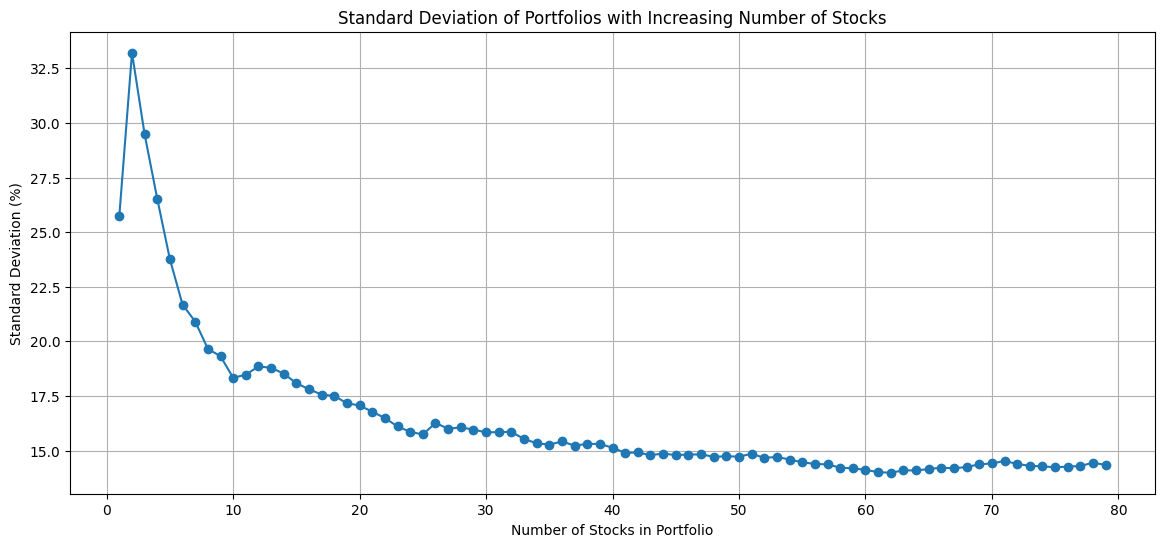

1     25.759
2     33.214
3     29.473
4     26.521
5     23.751
6     21.679
7     20.904
8     19.655
9     19.318
10    18.327
11    18.473
12    18.847
13    18.790
14    18.519
15    18.083
16    17.803
17    17.561
18    17.499
19    17.163
20    17.062
dtype: float64

In [28]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_stdev_different_portfolios(stock_symbols):
    """
    Calculate standard deviation for portfolios with increasing numbers of stocks and visualize the results.

    Args:
    stock_symbols (list): A list of stock symbols without '.NS'.

    Returns:
    Series: Series containing the standard deviation for portfolios with increasing numbers of stocks.
    """
    # Add '.NS' to each stock symbol
    stock_symbols_ns = [symbol + '.NS' for symbol in stock_symbols]

    # Download daily stock data
    stock_data = yf.download(stock_symbols_ns, start='2015-01-01', end='2020-01-01')['Adj Close']

    # Calculate daily returns
    daily_returns = stock_data.pct_change().dropna()

    # Dictionary to hold expected standard deviation of portfolios
    sd = {}

    # Define number of stocks in each portfolio
    number_of_stocks = np.arange(1, len(daily_returns.columns)+1)

    # Iterate through each portfolio
    for num_stocks in number_of_stocks:
        # Create equal weights for each constituent in the stock
        weights = np.full(num_stocks, 1/num_stocks)

        # Extract data from whole dataset
        stock_data_subset = daily_returns.iloc[:, :num_stocks]

        # Create covariance matrix
        cov_mat = stock_data_subset.cov()

        # Calculate annual covariance matrix
        cov_mat = cov_mat * 252

        # Calculate expected portfolio volatility
        expected_portfolio_variance = weights.T.dot(cov_mat).dot(weights)
        expected_portfolio_std_dev = np.sqrt(expected_portfolio_variance)

        # Store in dictionary
        sd[num_stocks] = round(expected_portfolio_std_dev * 100, 3)

    std_dev_of_different_portfolios = pd.Series(sd)

    # Plot standard deviations
    plt.figure(figsize=(14, 6))
    plt.plot(std_dev_of_different_portfolios.index, std_dev_of_different_portfolios.values, marker='o', linestyle='-')
    plt.title('Standard Deviation of Portfolios with Increasing Number of Stocks')
    plt.xlabel('Number of Stocks in Portfolio')
    plt.ylabel('Standard Deviation (%)')
    plt.grid(True)
    plt.show()

    return std_dev_of_different_portfolios[:20]

#checking the elbow curve
elbow_curve = calculate_stdev_different_portfolios(relevant_stocks)
elbow_curve

AS WE CAN CLEARLY SEE THAT AFTER A CERTAIN AMOUNT OF STOCKS , VOLATILITY CAN'T FURTHER BE REDUCED , SO WE WILL GO WITH ONLY INITIAL 20 PERFORMERS AND WILL SELECT ONLY ONE STOCK FROM ONE SECTOR AS THERE IS LIKELY TO BE A CORRELATION BETWEEN SAME SECTORAL STOCKS

# DEFINING A FUNCTION WHICH CALCULATES SHARPE RATIOS FOR AN INDIVIDUAL STOCK AND THEN TAKE THE TOP PERFORMERS TO CONSTRUCT A 10 STOCK PORTFOLIO

In [30]:
import pandas as pd
import yfinance as yf
import numpy as np

def calculate_sharpe_ratio(stock_symbols):
    all_data = pd.DataFrame()

    # Iterate over each stock symbol
    for stock in stock_symbols:
        # Download stock data
        stock_data = yf.download(stock + '.NS', start='2015-01-01', end='2020-01-01')[['Adj Close']]

        # Add stock data to the DataFrame
        all_data[stock] = stock_data['Adj Close']

    # Drop columns with NaN values
    cleaned_data = all_data.dropna(axis=1)

    # Calculate daily returns
    daily_returns = cleaned_data.pct_change().dropna()

    # Calculate annualized mean returns
    annualized_returns = daily_returns.mean() * 252

    # Calculate annualized standard deviation of returns
    annualized_std_returns = daily_returns.std() * np.sqrt(252)

    # Calculate Sharpe ratio
    sharpe_ratio = annualized_returns / annualized_std_returns

    # Create DataFrame with Sharpe ratios
    sorted_sharpe_ratio = sharpe_ratio.sort_values(ascending=False)


    # Create DataFrame with Sharpe ratios
    sharpe_df = pd.DataFrame({'Sharpe Ratio': sorted_sharpe_ratio})

    return sharpe_df

In [31]:
sharpe_df = calculate_sharpe_ratio(relevant_stocks)
sharpe_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Sharpe Ratio
BAJFINANCE,1.676994
BAJAJFINSV,1.476313
HDFCBANK,1.321287
RELIANCE,1.142948
BRITANNIA,1.130504
...,...
COALINDIA,-0.083657
BANKBARODA,-0.121928
ONGC,-0.150950
SUNPHARMA,-0.228698


In [32]:
#selecting top 30 stocks

performers = sharpe_df[:30]
performers
portfolio_symbols = performers.index.tolist()
portfolio_symbols

['BAJFINANCE',
 'BAJAJFINSV',
 'HDFCBANK',
 'RELIANCE',
 'BRITANNIA',
 'HINDUNILVR',
 'BIOCON',
 'BERGEPAINT',
 'SRF',
 'KOTAKBANK',
 'MUTHOOTFIN',
 'PIDILITIND',
 'TITAN',
 'CHOLAFIN',
 'NESTLEIND',
 'BAJAJHLDNG',
 'ASIANPAINT',
 'PGHH',
 'MPHASIS',
 'PIIND',
 'NAUKRI',
 'MARUTI',
 'MARICO',
 'BPCL',
 'JSWSTEEL',
 'UPL',
 'HAVELLS',
 'DABUR',
 'SHREECEM',
 'TATACONSUM']

In [34]:
# Empty dataframe to store stock symbols and sectors
stock_sector_df = pd.DataFrame(columns=['Symbol', 'Sector'])

# Fetch sector information for each stock
for symbol in portfolio_symbols:
    symbol_with_extension = f"{symbol}.NS"  # Append .NS extension
    stock = yf.Ticker(symbol_with_extension)
    info = stock.info
    sector = info.get('sector', 'Unknown')
    stock_sector_df.loc[len(stock_sector_df)] = {'Symbol': symbol, 'Sector': sector}
# Set serial number as an index
stock_sector_df.index = pd.Index(range(1, len(stock_sector_df) + 1))

print(stock_sector_df)


        Symbol                  Sector
1   BAJFINANCE      Financial Services
2   BAJAJFINSV      Financial Services
3     HDFCBANK      Financial Services
4     RELIANCE                  Energy
5    BRITANNIA      Consumer Defensive
6   HINDUNILVR      Consumer Defensive
7       BIOCON              Healthcare
8   BERGEPAINT         Basic Materials
9          SRF         Basic Materials
10   KOTAKBANK      Financial Services
11  MUTHOOTFIN      Financial Services
12  PIDILITIND         Basic Materials
13       TITAN       Consumer Cyclical
14    CHOLAFIN      Financial Services
15   NESTLEIND      Consumer Defensive
16  BAJAJHLDNG      Financial Services
17  ASIANPAINT         Basic Materials
18        PGHH      Consumer Defensive
19     MPHASIS              Technology
20       PIIND         Basic Materials
21      NAUKRI  Communication Services
22      MARUTI       Consumer Cyclical
23      MARICO      Consumer Defensive
24        BPCL                  Energy
25    JSWSTEEL         Ba

In [35]:
#lets groupby the stock_sector_df by sector
stock_sector_df.groupby('Sector').size()

Sector
Basic Materials           8
Communication Services    1
Consumer Cyclical         2
Consumer Defensive        7
Energy                    2
Financial Services        7
Healthcare                1
Industrials               1
Technology                1
dtype: int64

In [36]:
#selecting only first values of a unique sector
stock_sector_df = stock_sector_df.groupby('Sector').first()
stock_sector_df

,Symbol
Sector,
Basic Materials,BERGEPAINT
Communication Services,NAUKRI
Consumer Cyclical,TITAN
Consumer Defensive,BRITANNIA
Energy,RELIANCE
Financial Services,BAJFINANCE
Healthcare,BIOCON
Industrials,HAVELLS
Technology,MPHASIS


In [37]:
#we will construct a portfolio from these stocks
port_opt_sym = stock_sector_df['Symbol'].tolist()
print(port_opt_sym)

['BERGEPAINT', 'NAUKRI', 'TITAN', 'BRITANNIA', 'RELIANCE', 'BAJFINANCE', 'BIOCON', 'HAVELLS', 'MPHASIS']


In [39]:
#download adj close data for the stocks from yfinance and add .NS as an extension

df_ = pd.DataFrame()

for stock in port_opt_sym:
    df_ = pd.concat([df_, yf.download(stock + '.NS', start='2015-01-01', end='2020-01-01')[['Adj Close']]], axis=1)

df_.columns = port_opt_sym

portfolio_ = pd.DataFrame(columns=['returns','volatility'])
#returns calculaions
daily_returns = df_.pct_change().dropna()
annualized_returns = daily_returns.mean() * 252
annualized_std_returns = daily_returns.std() * np.sqrt(252)
portfolio_['returns'] = annualized_returns
portfolio_['volatility'] = annualized_std_returns
portfolio_.index = port_opt_sym
portfolio_

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,returns,volatility
BERGEPAINT,0.316126,0.314027
NAUKRI,0.290781,0.359706
TITAN,0.288006,0.313395
BRITANNIA,0.282257,0.249673
RELIANCE,0.293878,0.257123
BAJFINANCE,0.572720,0.341516
BIOCON,0.353050,0.335294
HAVELLS,0.229483,0.299031
MPHASIS,0.252938,0.304726


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Best Sharpe Ratio Portfolio:
Returns: 0.3618569150682941
Volatility: 0.16734237858569517
Sharpe Ratio: 2.162374636517964
optimal_weights : [0.04272864 0.12027596 0.0962207  0.10768597 0.18327763 0.24562716
 0.09196107 0.00515968 0.10706319]


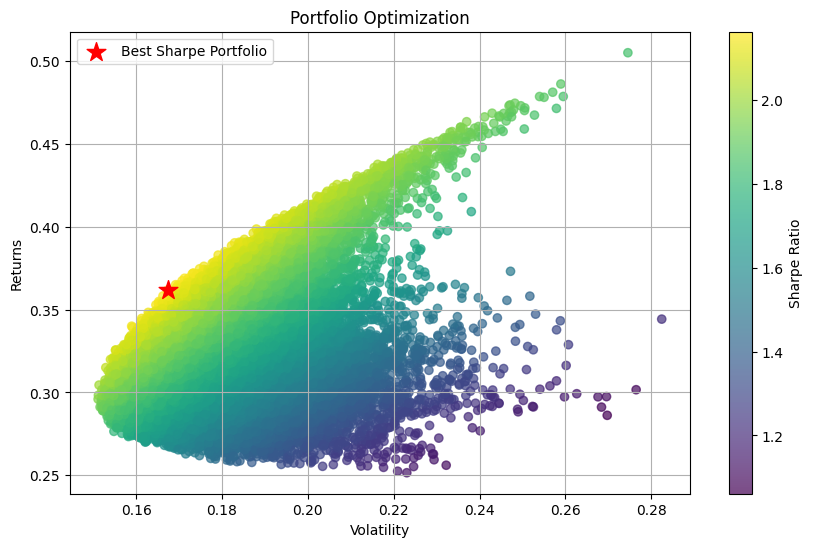

In [40]:
# List of stock symbols
port_opt_sym = stock_sector_df['Symbol'].tolist()

# Download adjusted close data for the stocks
df_ = pd.DataFrame()
for stock in port_opt_sym:
    df_ = pd.concat([df_, yf.download(stock + '.NS', start='2015-01-01', end='2020-01-01')['Adj Close']], axis=1)
df_.columns = port_opt_sym

# Calculate daily returns
daily_returns = df_.pct_change().dropna()

# Calculate annualized returns and standard deviations
annualized_returns = daily_returns.mean() * 252
annualized_std_returns = daily_returns.std() * np.sqrt(252)

# Calculate covariance matrix
annual_cov_matrix = daily_returns.cov() * 252

# Generate random portfolio weights
np.random.seed(11)
weights = np.random.dirichlet(np.ones(len(port_opt_sym)), size=50000)

# Calculate portfolio returns, volatility, and Sharpe ratio for each set of weights
portfolio_returns = np.dot(weights, annualized_returns)
portfolio_volatility = np.sqrt(np.diag(np.dot(weights, np.dot(annual_cov_matrix, weights.T))))
portfolio_sharpe_ratio = portfolio_returns / portfolio_volatility

# Find the index of the portfolio with the highest Sharpe ratio
best_sharpe_index = np.argmax(portfolio_sharpe_ratio)

# Retrieve the corresponding portfolio returns and volatility
best_sharpe_return = portfolio_returns[best_sharpe_index]
best_sharpe_volatility = portfolio_volatility[best_sharpe_index]
optimal_weights = weights[best_sharpe_index]



print("Best Sharpe Ratio Portfolio:")
print("Returns:", best_sharpe_return)
print("Volatility:", best_sharpe_volatility)
print("Sharpe Ratio:", portfolio_sharpe_ratio[best_sharpe_index])
print(f'optimal_weights : {optimal_weights}')

# Visualize Sharpe ratio vs. volatility
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatility, portfolio_returns, c=portfolio_sharpe_ratio, cmap='viridis', marker='o', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.title('Portfolio Optimization')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.grid(True)

# Mark the point representing the best Sharpe portfolio
plt.scatter(best_sharpe_volatility, best_sharpe_return, color='red', marker='*', s=200, label='Best Sharpe Portfolio')
plt.legend()

plt.show()


In [42]:

# List of stock symbols
port_opt_sym = stock_sector_df['Symbol'].tolist()

# Download adjusted close data for the stocks
df_latest = pd.DataFrame()
for stock in port_opt_sym:
    df_latest = pd.concat([df_latest, yf.download(stock + '.NS', start='2020-01-01', end='2024-04-14')['Adj Close']], axis=1)
df_latest.columns = port_opt_sym

print(''*20)

# Calculate daily returns
daily_returns_latest = df_latest.pct_change().dropna()

# Calculate annualized returns and standard deviations
annualized_returns_latest = daily_returns_latest.mean() * 252
annualized_std_returns_latest = daily_returns_latest.std() * np.sqrt(252)

# Calculate covariance matrix
annual_cov_matrix_latest = daily_returns_latest.cov() * 252

# Generate random portfolio weights
np.random.seed(11)
weights_latest = optimal_weights.reshape(-1, 9)

# Calculate portfolio returns, volatility, and Sharpe ratio for each set of weights
weights_latest_equal = np.full(len(port_opt_sym), 1/len(port_opt_sym))

# Calculate portfolio returns, volatility, and Sharpe ratio for the latest set of weights
portfolio_returns_latest = np.dot(weights_latest, annualized_returns_latest.values)
portfolio_volatility_latest = np.sqrt(np.diag(np.dot(weights_latest, np.dot(annual_cov_matrix_latest, weights_latest.T))))

# Calculate portfolio returns, volatility, and Sharpe ratio for the equal weights portfolio
weights_latest_equal = np.repeat(1/len(port_opt_sym), len(port_opt_sym))
portfolio_returns_latest_equal = np.dot(weights_latest_equal, annualized_returns_latest.values)
portfolio_volatility_latest_equal = np.sqrt(np.dot(weights_latest_equal, np.dot(annual_cov_matrix_latest, weights_latest_equal)))

# Calculate portfolio Sharpe ratio
portfolio_sharpe_ratio_latest = portfolio_returns_latest / portfolio_volatility_latest
portfolio_sharpe_ratio_latest_equal = portfolio_returns_latest_equal / portfolio_volatility_latest_equal

print("Portfolio Sharpe Ratio (Optimal Weights):\n", portfolio_sharpe_ratio_latest)
print("Portfolio Sharpe Ratio (Equal Weights):\n", portfolio_sharpe_ratio_latest_equal)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Portfolio Sharpe Ratio (Optimal Weights):
 [0.97378694]
Portfolio Sharpe Ratio (Equal Weights):
 1.0489519775063298


[*********************100%%**********************]  1 of 1 completed


<Axes: >

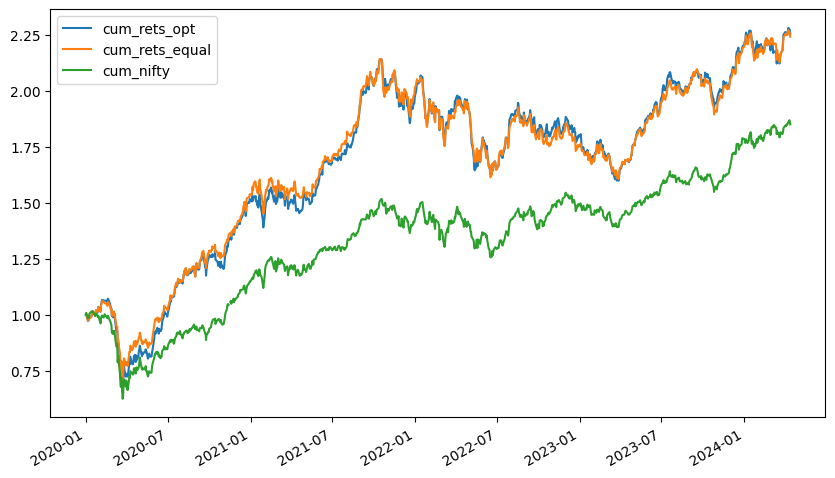

In [47]:
# Calculate daily portfolio returns using optimal weights
daily_returns_latest_port_opt = np.dot(optimal_weights, np.array(daily_returns_latest.T))
daily_returns_latest_port_equal = np.dot(weights_latest_equal, np.array(daily_returns_latest.T))
# Calculate cumulative returns of the portfolio
cum_rets_optimal = pd.DataFrame(np.cumprod(daily_returns_latest_port_opt + 1), columns = ['cum_rets_opt'],index=daily_returns_latest.index)
cum_rets_equal = pd.DataFrame(np.cumprod(daily_returns_latest_port_equal + 1), columns = ['cum_rets_equal'], index=daily_returns_latest.index)


#nifty data for backtesting
nifty = yf.download('^NSEI', start='2019-12-31', end='2024-04-14')['Adj Close']
nifty_rets = nifty.pct_change().dropna()
cum_nifty = np.cumprod(nifty_rets + 1)


combined_df = pd.concat([cum_rets_optimal, cum_rets_equal,cum_nifty], axis=1)
combined_df.columns = ['cum_rets_opt', 'cum_rets_equal', 'cum_nifty']
combined_df.plot(figsize=(10, 6))



> WE CAN SEE THAT OUR PORTFOLIO HAS BEATEN THE RETURNS OF THE BENCHMARK , YET WE HAVE TO CHECK METRICS SUCH AS VAR, CVAR AND CHECK HOW MUCH OF OUR CAPITAL IS AT RISK

In [48]:
#drawdown analysis on cum_rets_equal and cum_nifty
def calc_drawdown(cum_rets):
    # Calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1
    return drawdown

def plot_drawdown(drawdown):
    fig = plt.figure(figsize=(10, 7))
    # Plot
    drawdown.plot(color='r')
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()


-0.339


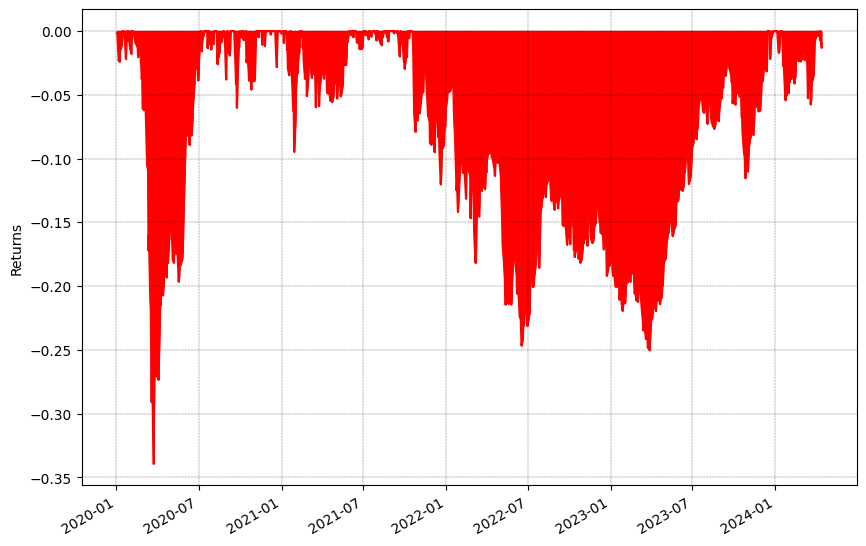

In [55]:
#euqual weights portfolio drawdown
portfolio_drawdown_equal = calc_drawdown(combined_df['cum_rets_equal'])
print(round(portfolio_drawdown_equal.min(),3))
plot_drawdown(portfolio_drawdown_equal)

-0.465


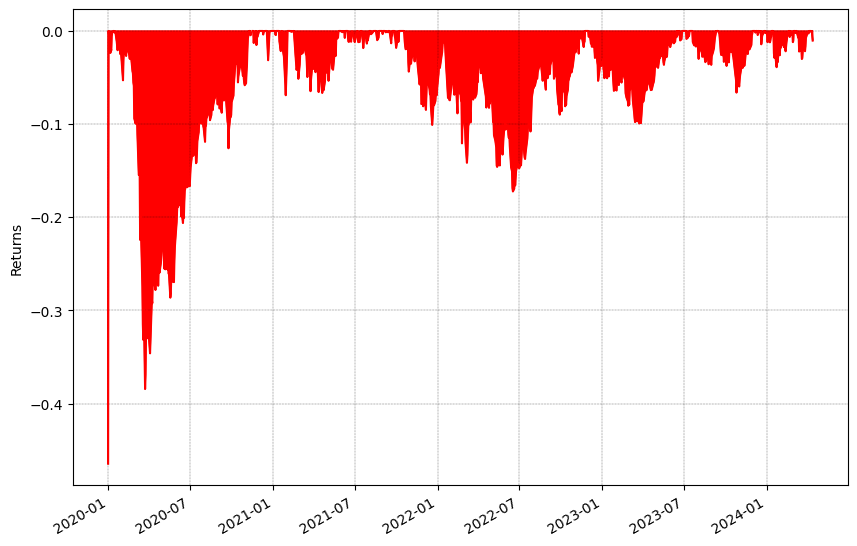

In [56]:
#nifty drawdown
portfolio_drawdown_nifty = calc_drawdown(combined_df['cum_nifty'])
print(round(portfolio_drawdown_nifty.min(),3))
plot_drawdown(portfolio_drawdown_nifty)

>CONCLUSION -- OUR CONSTRUCTED PORTFOIO HAS A DRAWDOWN OF 34% WHILE NIFTY HAS 46.5% IN THE SAME PERIOD. HENCE OUR PORTFOLIO PERFORMED BETTER THAT WAY TOO

In [60]:
#value at risk and conditional var calculations
def var_cvar(returns, confidence_level=95):
    # Convert returns to a pandas series to utilize pandas functionality if it's not already one
    returns = pd.Series(returns)
    # Sort returns from worst to best
    sorted_rets = returns.sort_values(ascending=True)

    # Calculate VaR
    var_index = int((100 - confidence_level) * len(sorted_rets) / 100)
    var = sorted_rets.iloc[var_index]

    # Calculate CVaR (Expected Shortfall)
    cvar = sorted_rets.iloc[:var_index + 1].mean()

    return var, cvar

# Example Usage:
# Assume daily_returns_latest_port_equal is a list or numpy array of returns
var, cvar = var_cvar(daily_returns_latest_port_equal, 95)
print("VaR at 95% confidence level:", var)
print("CVaR at 95% confidence level:", cvar)


VaR at 95% confidence level: -0.0188022891295372
CVaR at 95% confidence level: -0.031031376923932937


In [61]:
var_cvar_equal = var_cvar(nifty_rets, 95)
print("VaR at 95% confidence level:", var_cvar_equal[0])
print("CVaR at 95% confidence level:", var_cvar_equal[1])

VaR at 95% confidence level: -0.017155677232420508
CVaR at 95% confidence level: -0.030284363632256086
